In [1]:
from torchvision import models
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [2]:
alexnet = models.AlexNet()

In [3]:
resnet = models.resnet101(pretrained=True)
resnet

D:\Anaconda\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
D:\Anaconda\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [4]:
from torchvision import transforms
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )])

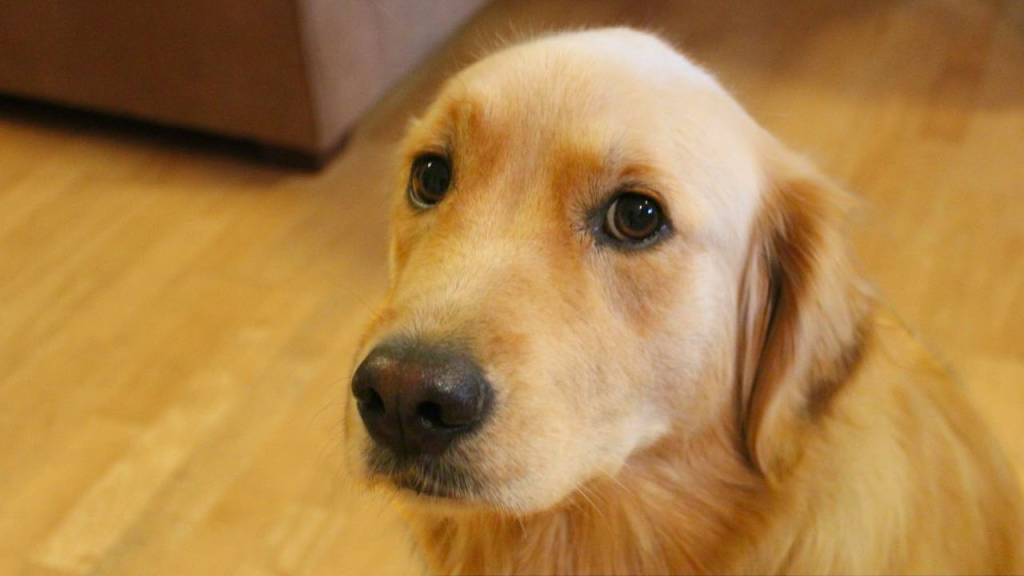

In [5]:

from PIL import Image
img = Image.open("dog.png")
img

In [6]:
img_t = preprocess(img)

In [7]:
import torch
batch_t = torch.unsqueeze(img_t, 0)
resnet.eval()
out = resnet(batch_t)
out

tensor([[-3.4555e+00, -1.6642e+00, -2.4643e+00, -3.2401e+00, -3.2361e+00,
         -1.3630e+00, -2.0326e+00, -2.5493e+00, -1.3136e+00, -2.9363e+00,
         -1.6862e+00, -1.3591e+00, -2.6530e+00, -2.9708e+00, -2.4566e+00,
         -2.8114e+00, -3.3225e+00, -8.0488e-01, -6.7122e-01, -1.2012e+00,
         -3.0428e+00, -3.9643e+00, -2.3467e+00, -1.1512e+00, -1.0782e+00,
         -1.0329e+00, -3.0816e+00, -2.4265e+00, -2.1599e+00, -3.1873e+00,
         -3.3087e+00, -1.8727e+00, -2.0737e+00, -2.1116e+00, -1.8539e+00,
         -3.2169e+00, -1.0980e+00, -1.0851e+00, -1.2579e+00, -9.7403e-01,
         -5.0676e-01, -1.5474e+00,  1.4485e+00,  1.2920e-01, -1.8703e+00,
         -1.5046e+00,  9.2930e-01, -1.0110e+00, -3.0195e+00, -2.7705e+00,
         -2.6268e+00, -2.0690e+00, -1.8251e+00, -1.9803e+00, -1.7778e+00,
         -1.4042e+00, -5.2112e-01, -2.0288e+00, -3.3248e+00, -5.5067e-01,
         -4.0346e-01, -1.1923e+00, -8.4867e-01, -1.4465e+00, -1.5197e+00,
         -2.1524e+00, -1.7439e+00, -4.

In [9]:
import torch
import urllib.request

# Download labels if not present
url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
urllib.request.urlretrieve(url, "imagenet_classes.txt")

# Load labels
with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

# Let's say `out` is the output from a model like resnet50
# Example: out = model(image_tensor)

_, index = torch.max(out, 1)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
print(labels[index[0]], percentage[index[0]].item())


golden retriever 96.36597442626953
